# This notebook is completely based on a Coursera course called "Crash Course on Python by Google."

+ This was the final project assignment for that course and this was my submission for it. I have modified the original submission document with comments where necessary as a guide for the user.   

+ The goal of this notebook is to generate a wordcloud image based on some input text.

+ The process is as follows:
   + Upload some input text
&rarr; disregard puncutation and uninteresting words like "the","as","and" etc. &rarr; calculate frequencies of the interesting words (i.e. number of occurences of these words) in the input text &rarr; then use the frequencies to generate the wordcloud image.

The word cloud image essentially weights highly frequent words with a bolder and higher fontsize relative to less frequent words.

## Here are all the installs and imports the user needs for your word cloud script and uploader widget:

Some of the packages here (like uploader widgets etc.) are not necessary so they are commented out. If the user wants to upload a larger file or if they want to run things as a .py file, then they can uncomment these lines and it will be useful.

In [ ]:
# Here are all the installs and imports the user needs for your word cloud script and uploader widget
!pip install wordcloud
#!pip install fileupload
#!pip install ipywidgets
#!jupyter nbextension install --py --user fileupload
#!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
#import fileupload
#import io
#import sys

In [ ]:
#Mount Google Drive to save plots/data:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#plot and data file path to save plots/data and acess files:
file_path = '/content/drive/My Drive/Colab Notebooks/'
plot_path = '/content/drive/My Drive/Colab Notebooks/'

In [ ]:
# This is the uploader widget and it is used if using a .py file,  but it won't be necessary for this .ipynb file.
# The uploader widget can be used if the user wants to upload a large file, then the above import lines must be uncommented.

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

###This is the input text supplied to `calculate_frequencies()` function and it will be used to generate the word cloud image:

In [ ]:

text ="""The goal of this book is to teach you to think like a computer scientist.This way of thinking combines some of the best features
of mathematics, engineering, and natural science. Like mathematicians, computer scientists use formal languages to denote ideas
(specifically computations). Like engineers, they design things, assembling components into systems and evaluating tradeoffs among alternatives. Like scientists, they observe the behavior of complex systems, form hypotheses, and test predictions.
The single most important skill for a computer scientist is problem solving.
Problem solving means the ability to formulate problems, think creatively about solutions, and express a solution clearly and accurately.
As it turns out, the process of learning to program is an excellent opportunity to practice problem-solving skills.
That’s why this chapter is called, “The way of the program.”
On one level, you will be learning to program, a useful skill by itself. On another level, you will use programming as a means to an end.
As we go along, that end will become clearer. The programming language you will learn is Python. Python is an example of a high-level
language; other high-level languages you might have heard of are C, C++, Perl, and Java.
There are also low-level languages, sometimes referred to as “machine languages” or “assembly languages.”
Loosely speaking, computers can only run programs written in low- level languages. So programs written in a high-level language have to be
processed before they can run.
This extra processing takes some time, which is a small disadvantage of high-level languages.
The advantages are enormous.
First, it is much easier to program in a high-level language. Programs written in a high-level language take less time to write,
they are shorter and easier to read, and they are more likely to be correct. Second, high-level languages are portable,
meaning that they can run on different kinds of computers with few or no modifications.
Low-level programs can run on only one kind of computer and have to be rewritten to run on another. """

In [ ]:
def calculate_frequencies(text):
    """
    This function takes in a string of text and creates a dictionary of words that are considered interesting
    (i.e. it ignores punctuation marks and words like: "and", "the", "as" etc.), where the key is the word and the value
    is the number of times (frequency) the word appears in the text. This is then passed onto the wordcloud module, and this
    object is used to generate the wordcloud image.
    """
    ## Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~—+'“”'''
    uninteresting_words = ["the", "a", "to", "if", "is","in","it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we","us" ,"our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their","then", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few","for","more", "some", "such","on","no","not", "nor", "too", "very", "can", "will", "just"]

    # LEARNER CODE START HERE
    word_dict = {}
    remove_punc = " "
    word_list = []
    #start by removing punctuation:
    for character in text:
        if character not in punctuations:
            remove_punc += character
        elif character == '-':
            remove_punc += character.replace('-'," ")
    punc_remvd_list = remove_punc.split()
    for word in punc_remvd_list:
        if word.lower() not in uninteresting_words:
            word_list.append(word.lower())
    for word in word_list:
        if word not in word_dict:
            word_dict[word] = 0
        word_dict[word] += 1
    #return word_dict ## uncomment this line and comment the lines below to check dictionary is working correctly.
    #wordcloud:
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(word_dict)
    return cloud.to_array()

  ### The goal is to generate the word cloud image so the dictionary that is created needs to be passed onto the wordcloud module such that the word cloud image can be created below.

  If the user wants to check the dictonary, then the user can uncomment the `return word_dict` line and comment the lines below `#wordcloud:`.

In [ ]:
#print(calculate_frequencies(text))

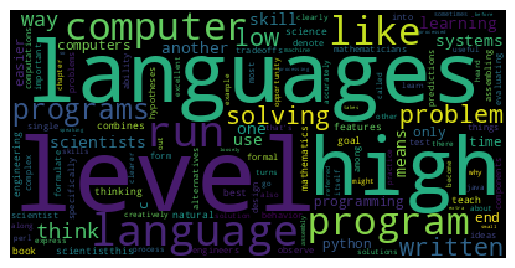

In [ ]:
# Display your wordcloud image using inbuilt functions in python and save the resulting image.
# The path for the saving the plot image can be modified above to save it to the desired path.

myimage = calculate_frequencies(text)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.savefig(plot_path +'word_cloud'+'.png',bbox_inches='tight')
plt.show()

 **The result suggests that words like: "languages", "program" , "high", and "level" are used often (highly frequent) in the input text, whereas words like "end", "systems", and "means" are non-frequent.**

# End of Document. #